### 6.4 Machine Learning Part 1

### This script contains the following:

1. Importing libraries and data

2. Data cleaning

3. Data prep for regression analysis

4. Regression analysis



### 1. Importing libraries and data

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# This option ensures that the graphs we will create are displayed within the notebook without the need to "call" 
#them specifically.

%matplotlib inline

In [15]:
path = '/Users/bente/careerfoundry /exercise_6/02 Data/prepared data'

In [16]:
df = pd.read_csv(os.path.join(path,'LAST_CLEANED.csv'))

### 2. Data overview 

In [17]:
df.head()

,name,year,continent,least_developed,life_expect,population,CO2_emiss,health_spend(% of GDP),electr_consum(kWh/capita),forest_area,gdp_per_capita,internet_users,military_spend,open_defecation,drinking_water_user,adult_obesity,beer_per_capita,life_exp_category
0,Albania,2000,Europe,0,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431,Middle Life Expectancy
1,Albania,2001,Europe,0,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995,Middle Life Expectancy
2,Albania,2002,Europe,0,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697,Middle Life Expectancy
3,Albania,2003,Europe,0,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830,Middle Life Expectancy
4,Albania,2004,Europe,0,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617,High Life Expectancy


In [18]:
df.columns

Index(['name', 'year', 'continent', 'least_developed', 'life_expect',
       'population', 'CO2_emiss', 'health_spend(% of GDP)',
       'electr_consum(kWh/capita)', 'forest_area', 'gdp_per_capita',
       'internet_users', 'military_spend', 'open_defecation',
       'drinking_water_user', 'adult_obesity', 'beer_per_capita',
       'life_exp_category'],
      dtype='object')

In [19]:
# Check for missing values

df.isnull().sum()

name                         0
year                         0
continent                    0
least_developed              0
life_expect                  0
population                   0
CO2_emiss                    0
health_spend(% of GDP)       0
electr_consum(kWh/capita)    0
forest_area                  0
gdp_per_capita               0
internet_users               0
military_spend               0
open_defecation              0
drinking_water_user          0
adult_obesity                0
beer_per_capita              0
life_exp_category            0
dtype: int64

### 3. Data prep for regression analysis 

Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

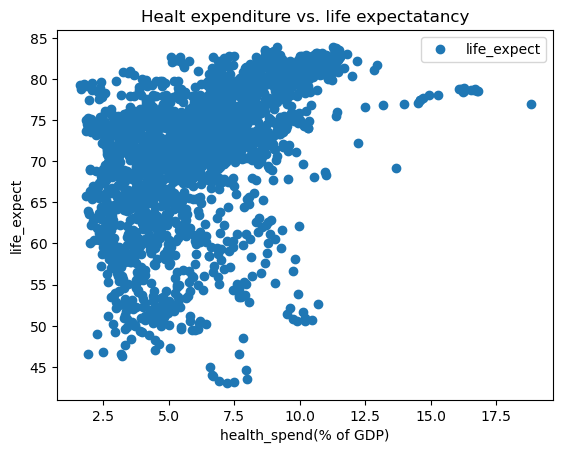

In [20]:
#Healt expenditure vs. life expectatancy
df.plot(x = 'health_spend(% of GDP)', y='life_expect',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Healt expenditure vs. life expectatancy')  
plt.xlabel('health_spend(% of GDP)')  
plt.ylabel('life_expect')  
plt.show()

Hypothesis: 
    
    The higher the health expenditure the higher the life expectancy 

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['health_spend(% of GDP)'].values.reshape(-1,1)
y = df['life_expect'].values.reshape(-1,1)

In [22]:
X

array([[7.2333703 ],
       [7.13952398],
       [6.90934134],
       ...,
       [4.67041826],
       [3.65976548],
       [3.42558146]])

In [23]:
y

array([[73.955],
       [74.288],
       [74.579],
       ...,
       [61.414],
       [61.292],
       [61.124]])

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [25]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

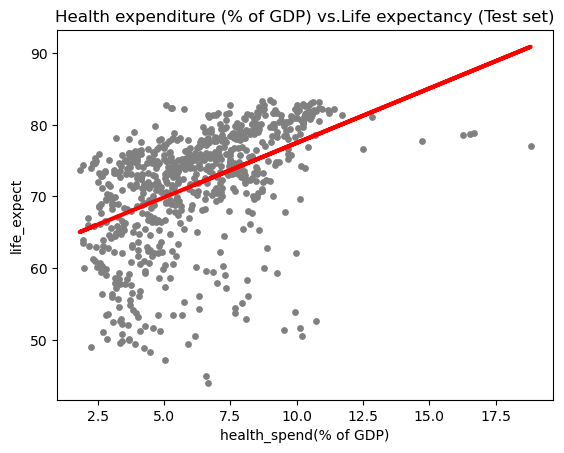

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Health expenditure (% of GDP) vs.Life expectancy (Test set)')
plot_test.xlabel('health_spend(% of GDP)')
plot_test.ylabel('life_expect')
plot_test.show()


I would say the model isnt a good fit for my data, as there is a lot of variance in the data and many dots that 
are quite far away from the regression line.

In [29]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [30]:
# Print the model summary statistics. This is where we evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.5201777]]
Mean squared error:  51.61380404585333
R2 score:  0.22685823538851346


In [31]:
y_predicted

array([[71.67532362],
       [73.69937941],
       [76.34108207],
       [73.54679857],
       [72.25080726],
       [76.0300909 ],
       [66.47090057],
       [70.62226404],
       [72.36236369],
       [71.66728836],
       [72.34136472],
       [73.19193781],
       [72.62193425],
       [66.56224242],
       [70.19689014],
       [76.7515119 ],
       [68.45438535],
       [65.77550846],
       [73.4160916 ],
       [71.79124309],
       [72.45135034],
       [69.97229419],
       [69.05613855],
       [73.85794848],
       [67.55417846],
       [75.14059987],
       [69.33629054],
       [76.79258054],
       [69.25466357],
       [69.25869678],
       [66.93952934],
       [71.90998812],
       [75.4622047 ],
       [73.2851592 ],
       [66.90682071],
       [72.82686574],
       [73.84105594],
       [67.85833441],
       [68.42962354],
       [74.51431755],
       [75.18700941],
       [66.46148369],
       [75.0414526 ],
       [71.40948504],
       [75.31063432],
       [68

In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,70.409000,71.675324
1,76.531000,73.699379
2,78.980488,76.341082
3,72.973000,73.546799
4,75.520244,72.250807
5,78.492683,76.030091
6,66.603000,66.470901
7,73.284000,70.622264
8,81.328000,72.362364
9,73.129000,71.667288


the predicted values sometimes have a big difference to the original values. The model doesnt fit to the data. 

### 5. Compare how the regression fits the training set¶

In [33]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [34]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.5201777]]
Mean squared error:  51.340750275533956
R2 score:  0.2240480927053763


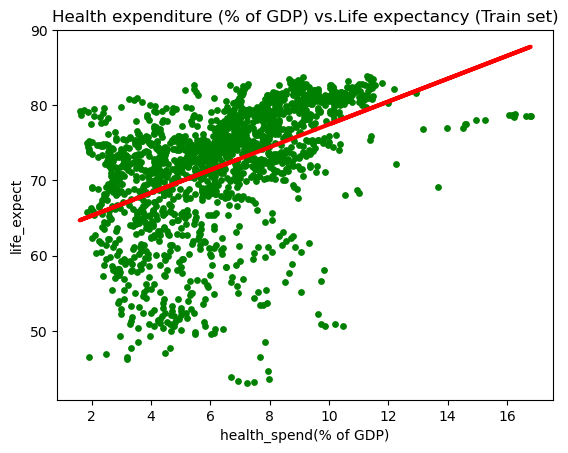

In [36]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Health expenditure (% of GDP) vs.Life expectancy (Train set)')
plot_test.xlabel('health_spend(% of GDP)')
plot_test.ylabel('life_expect')
plot_test.show() 

-> There’s still a lot of variance in the data that can’t be explained by the linear relationship between the two
variables. Thats why I can rule out my hypothesis "The higher the health spenditure, the higher the life expectancy".